In [11]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline

# Load the hour data

In [12]:
file_raw=pd.read_csv('d:/pydoc/hour.csv')

# task 2:

In [13]:
# 2.	cleans up the attribute names to make them more understandable 
# ['instant':'rec_id', 'dteday':'datetime', 'holiday':'is_holiday',  'workingday':'is_workingday',  /
# ,/, 'weathersit':'weather_condition',  'hum':'humidity',  'mnth':'month',  'cnt':'total_count',  'hr':'hour',  'yr':'year']

In [14]:
file_raw.head(0)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [19]:
file=file_raw.rename(columns={'instant':'rec_id','dteday':'datetime','holiday':'is_holiday','workingday':'is_workingday','weathersit':'weather_condition','hum':'humidity',  'mnth':'month','cnt':'total_count','hr':'hour',  'yr':'year'})
file['season_name']=file['season'].replace({1:'springer', 2:'summer', 3:'fall', 4:'winter'})
file['weekday']=file['weekday'].replace({0:1,1:2,2:3,3:4,4:5,5:6,6:7})

# Task 3

In [ ]:
# 3.	perform type-casting of attributes using utilities like pd.to_datetime() and astype(). Convert hour_df['datetime'] 
#  to datetime, and season, is_holiday, weekday, weather_condition, is_workingday, month,year, hour to category type.

In [20]:
file['datetime']=pd.to_datetime(file['datetime'])
file['year']=file['year'].replace({0:1,1:2})
file.head(7)

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count,season_name
0,1,2011-01-01,1,1,1,0,0,7,0,1,0.24,0.2879,0.81,0.0000,3,13,16,springer
1,2,2011-01-01,1,1,1,1,0,7,0,1,0.22,0.2727,0.80,0.0000,8,32,40,springer
2,3,2011-01-01,1,1,1,2,0,7,0,1,0.22,0.2727,0.80,0.0000,5,27,32,springer
3,4,2011-01-01,1,1,1,3,0,7,0,1,0.24,0.2879,0.75,0.0000,3,10,13,springer
4,5,2011-01-01,1,1,1,4,0,7,0,1,0.24,0.2879,0.75,0.0000,0,1,1,springer
5,6,2011-01-01,1,1,1,5,0,7,0,2,0.24,0.2576,0.75,0.0896,0,1,1,springer
6,7,2011-01-01,1,1,1,6,0,7,0,1,0.22,0.2727,0.80,0.0000,2,0,2,springer


# Task 4.	visualize hourly ridership counts across the seasons and summarize the outcome

In [18]:
file_hour_season_count=file.groupby(['season','hour'])['total_count'].mean()
ls_h_s_count=file_hour_season_count.values.tolist()
file_hour_season_count_index=file_hour_season_count.index.tolist()

In [5]:
#  create x,y axis values for ploting
# x_f_h_season=[str(a[0])+" : "+str(a[1]) for a in file_hour_season_count.index]
y_season_1_h_count=[] #''' for season 1 '''
y_season_2_h_count=[] #''' for season 2 '''
y_season_3_h_count=[] #''' for season 3 '''
y_season_4_h_count=[] #''' for season 4 '''
x_season_1_h_count=[] #''' for season 1 '''
x_season_2_h_count=[] #''' for season 2 '''
x_season_3_h_count=[] #''' for season 3 '''
x_season_4_h_count=[] #''' for season 4 '''
main_x_list=[]
main_y_list=[]
for a in file_hour_season_count_index:
        main_x_list.append(a)
        main_y_list.append(ls_h_s_count[file_hour_season_count_index.index(a)])
        if a[0]==1:
            temp=str(a[1])
            y_season_1_h_count.append(ls_h_s_count[file_hour_season_count_index.index(a)])
            x_season_1_h_count.append(temp)
        elif a[0]==2:
            temp=str(a[1])
            y_season_2_h_count.append(ls_h_s_count[file_hour_season_count_index.index(a)])
            x_season_2_h_count.append(temp)
        elif a[0]==3:
            temp=str(a[1])
            y_season_3_h_count.append(ls_h_s_count[file_hour_season_count_index.index(a)])
            x_season_3_h_count.append(temp)
        elif a[0]==4:
            temp= str(a[1])
            y_season_4_h_count.append(ls_h_s_count[file_hour_season_count_index.index(a)])
            x_season_4_h_count.append(temp)
##############################################################################################################################


NameError: name 'file_hour_season_count_index' is not defined

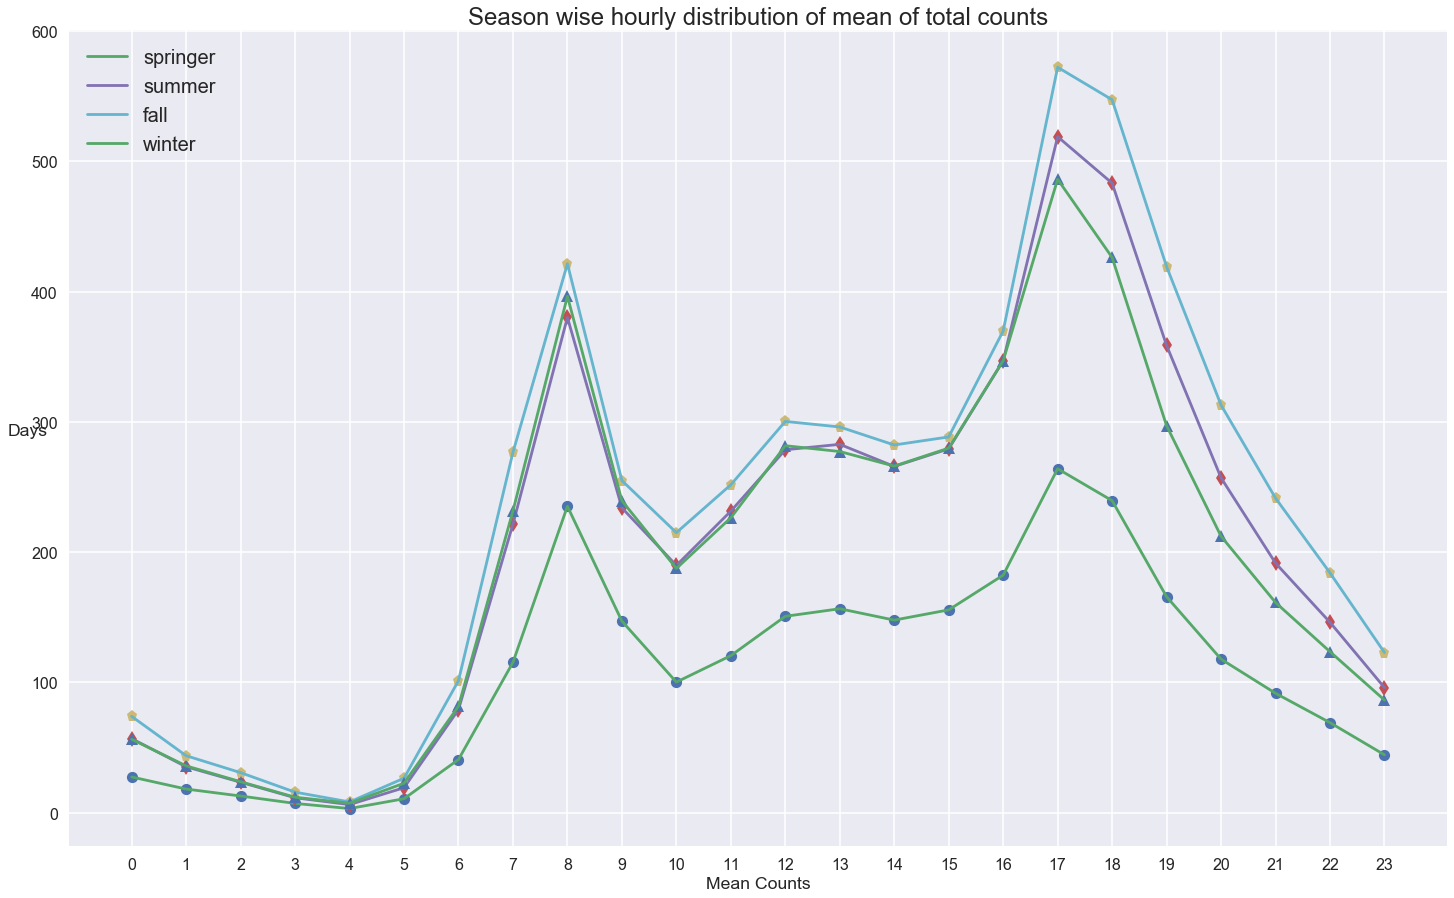

In [53]:
legend_lst_1=file['season_name'].unique()

# import matplot 
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
fig= plt.figure(figsize=(22,15))
plt.grid(True)
plt.plot(x_season_1_h_count,y_season_1_h_count,'o')
plt.plot(x_season_1_h_count,y_season_1_h_count,animated=True,label=str(legend_lst_1[0]))
plt.plot(x_season_2_h_count,y_season_2_h_count,'d')
plt.plot(x_season_2_h_count,y_season_2_h_count,label=str(legend_lst_1[1]))
plt.plot(x_season_3_h_count,y_season_3_h_count,'p')
plt.plot(x_season_3_h_count,y_season_3_h_count,label=str(legend_lst_1[2]))
plt.plot(x_season_4_h_count,y_season_4_h_count,'^')
plt.plot(x_season_4_h_count,y_season_4_h_count,label=str(legend_lst_1[3]))
plt.title("Season wise hourly distribution of mean of total counts",rotation='0',fontsize=24,fontweight=5)
plt.xlabel("Mean Counts",rotation='0')
plt.ylabel("Days",rotation='0')
plt.legend(loc=2, prop={'size': 20})
plt.savefig('D:/Antrix/ML_Code/Labs/ML_Project/Season_wise_hourly_distribution_of_mean_of_total_counts.png')
plt.show()

#  5.	visualize monthly ridership trends and summarize the outcome

In [54]:
file_monthly_r=file.groupby(['year','month'])['total_count'].mean()
type(file_monthly_r)
file.to_csv("D:/Antrix/ML_Code/Labs/ML_Project/data_for_task_2.csv")

In [55]:

file_monthly_r_index=file_monthly_r.index.tolist()
file_monthly_r_value=file_monthly_r.values.tolist()
x_file_monthly_r_index=[]
Y_file_monthly_r_value=[]
for i in file_monthly_r_index:
    if i[0]==1:
        x_file_monthly_r_index.append(i[1])
        Y_file_monthly_r_value.append(file_monthly_r_value[file_monthly_r_index.index(i)])


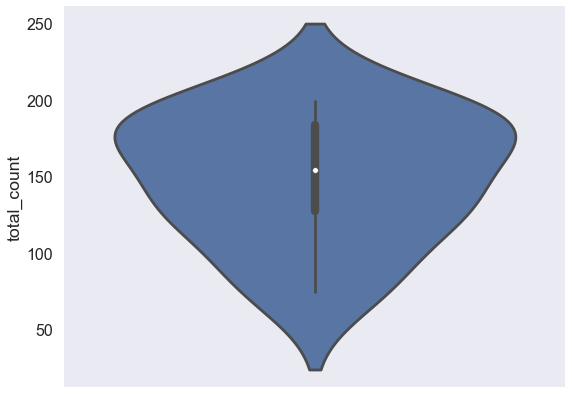

In [56]:
fig, ax = plt.subplots(figsize =(8, 7))
sb.violinplot( ax = ax, y = x_file_monthly_r_index ,data=file_monthly_r)


# task 6.	visualize distribution of ridership across days of the week and summarize the outcome

In [57]:
file_week_day=file.groupby(['weekday','hour'])['total_count'].mean()

In [58]:
file_week_day_index=file_week_day.index.tolist()
file_week_day_value=file_week_day.values.tolist()

In [59]:
x_weak_1_hour=[]# for week 1 x axis
x_weak_2_hour=[]# for week 2 x axis
x_weak_3_hour=[]# for week 3 x axis
x_weak_4_hour=[]# for week 4 x axis
x_weak_5_hour=[]# for week 5 x axis
x_weak_6_hour=[]# for week 6 x axis
x_weak_7_hour=[]# for week 7 x axis
y_weak_1_hour=[]# for week 1 y axis
y_weak_2_hour=[]# for week 2 y axis
y_weak_3_hour=[]# for week 3 y axis
y_weak_4_hour=[]# for week 4 y axis
y_weak_5_hour=[]# for week 5 y axis
y_weak_6_hour=[]# for week 6 y axis
y_weak_7_hour=[]# for week 7 y axis
###########################################################################################################################
for a in file_week_day_index:
    if a[0]==1:
        x_weak_1_hour.append(a[1])
        y_weak_1_hour.append(file_week_day_value[file_week_day_index.index(a)])
    elif a[0]==2:
        x_weak_2_hour.append(a[1])
        y_weak_2_hour.append(file_week_day_value[file_week_day_index.index(a)])
    elif a[0]==3:
        x_weak_3_hour.append(a[1])
        y_weak_3_hour.append(file_week_day_value[file_week_day_index.index(a)])
    elif a[0]==4:
        x_weak_4_hour.append(a[1])
        y_weak_4_hour.append(file_week_day_value[file_week_day_index.index(a)])
    elif a[0]==5:
        x_weak_5_hour.append(a[1])
        y_weak_5_hour.append(file_week_day_value[file_week_day_index.index(a)])
    elif a[0]==6:
        x_weak_6_hour.append(a[1])
        y_weak_6_hour.append(file_week_day_value[file_week_day_index.index(a)])
    elif a[0]==7:
        x_weak_7_hour.append(a[1])
        y_weak_7_hour.append(file_week_day_value[file_week_day_index.index(a)])

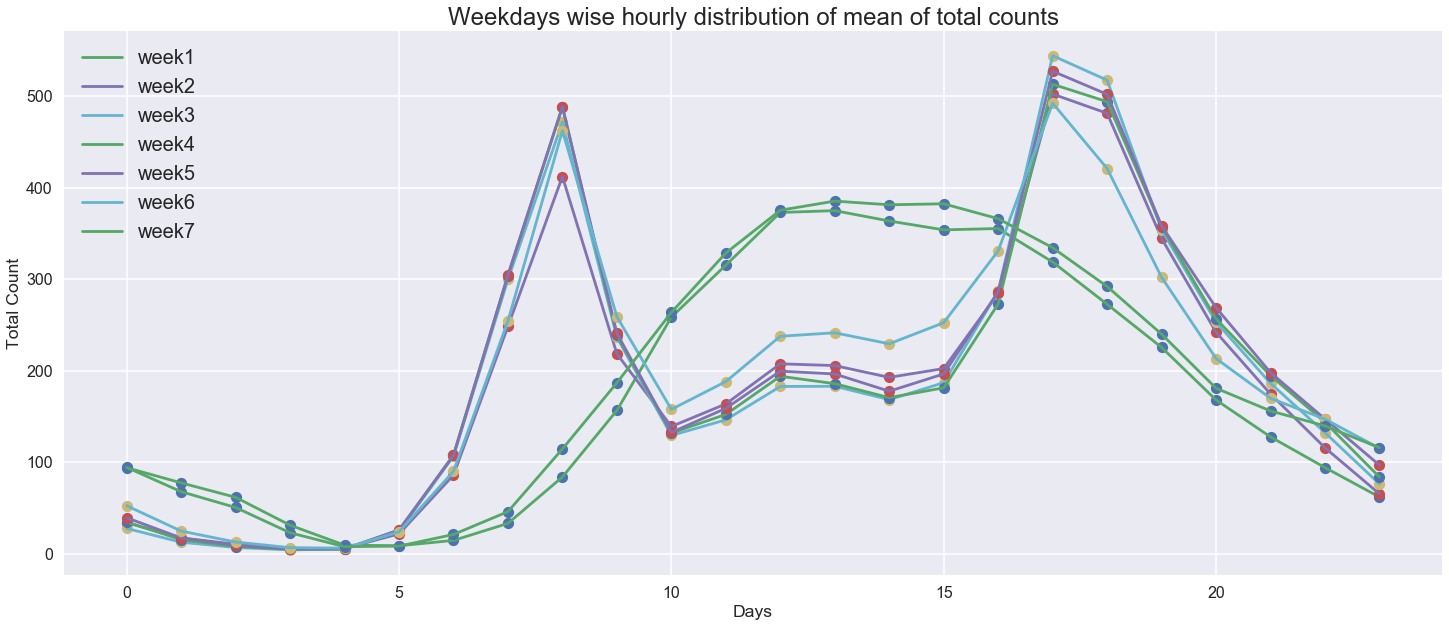

In [60]:
#########################################################################################################################
####################################      Ploting work will done here     ###############################################
#########################################################################################################################
ls_label_2=["week"+str(a) for a in file['weekday'].sort_values().unique()]
plt.style.use('seaborn-dark')
plt.figure(figsize=(22,10))
plt.grid(True)
plt.plot(x_weak_1_hour,y_weak_1_hour,'o')#week 1
plt.plot(x_weak_1_hour,y_weak_1_hour,label=ls_label_2[0])
plt.plot(x_weak_2_hour,y_weak_2_hour,'o')#week 2
plt.plot(x_weak_2_hour,y_weak_2_hour,label=ls_label_2[1])
plt.plot(x_weak_3_hour,y_weak_3_hour,'o')#week 3
plt.plot(x_weak_3_hour,y_weak_3_hour,label=ls_label_2[2])
plt.plot(x_weak_4_hour,y_weak_4_hour,'o')#week 4
plt.plot(x_weak_4_hour,y_weak_4_hour,label=ls_label_2[3])
plt.plot(x_weak_5_hour,y_weak_5_hour,'o')#week 5
plt.plot(x_weak_5_hour,y_weak_5_hour,label=ls_label_2[4])
plt.plot(x_weak_6_hour,y_weak_6_hour,'o')#week 6
plt.plot(x_weak_6_hour,y_weak_6_hour,label=ls_label_2[5])
plt.plot(x_weak_7_hour,y_weak_7_hour,'o')#week 7
plt.plot(x_weak_7_hour,y_weak_7_hour,label=ls_label_2[6])
plt.xlabel("Days")
plt.ylabel("Total Count")
plt.title("Weekdays wise hourly distribution of mean of total counts",fontsize=24,fontweight=5)
plt.legend(loc=2, prop={'size': 20})
plt.savefig('D:/Antrix/ML_Code/Labs/ML_Project/Weekdays_wise_hourly_distribution_of_mean_of_total_counts.png')
plt.show()

# Task 7.	visualize monthly ridership trends and summarize the outcome

In [61]:
file_year_month=file.groupby(['year','month'])['total_count'].mean()

In [62]:
file_year_month_index=file_year_month.index.tolist()
file_year_month_values=file_year_month.values.tolist()

In [63]:
x_m_1_y_m_list=[]
x_m_2_y_m_list=[]
##############################################################################################################################
y_m_1_y_m_list=[]
y_m_2_y_m_list=[]
##############################################################################################################################
for a in file_year_month_index:
    if a[0]==1:
        x_m_1_y_m_list.append(a[1])
        y_m_1_y_m_list.append(file_year_month_values[file_year_month_index.index(a)])
    if a[0]==2:
        x_m_2_y_m_list.append(a[1])
        y_m_2_y_m_list.append(file_year_month_values[file_year_month_index.index(a)])

1
2


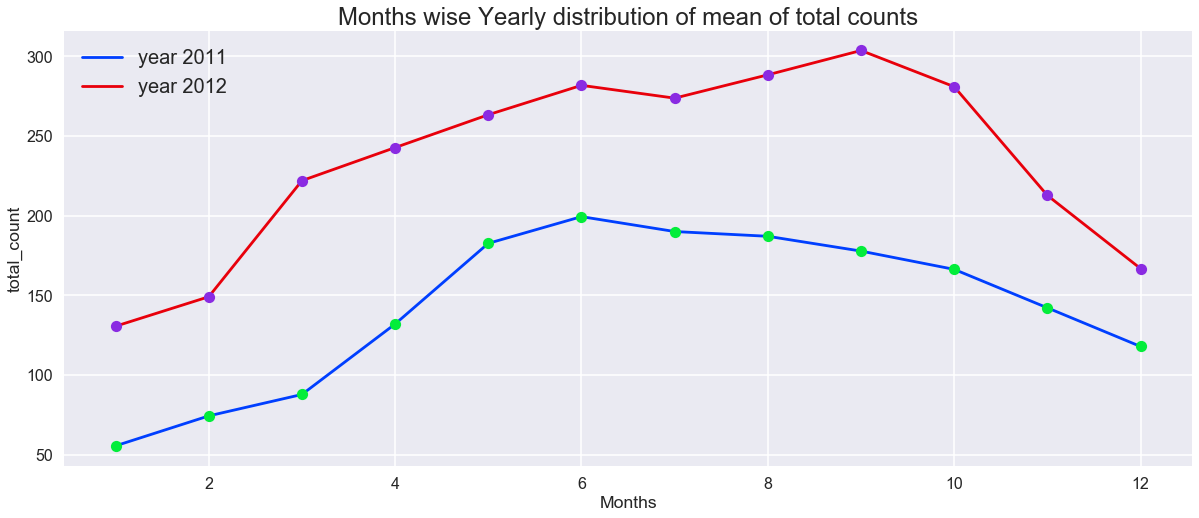

In [64]:
# Ploting works is on progress |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
ls_label_3_temp=[a for a in file['year'].sort_values().unique()]
ls_label_3=[]
for i in ls_label_3_temp:
    print(i)
    if i==1:
        temp="year 2011"
        ls_label_3.append(temp)
    elif i==2:
        temp="year 2012"
        ls_label_3.append(temp) 
plt.style.use('seaborn-bright')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(x_m_1_y_m_list,y_m_1_y_m_list,label=ls_label_3[0])
plt.plot(x_m_1_y_m_list,y_m_1_y_m_list,'o')
plt.plot(x_m_2_y_m_list,y_m_2_y_m_list,label=ls_label_3[1])
plt.plot(x_m_2_y_m_list,y_m_2_y_m_list,'o')
plt.legend(loc=2, prop={'size': 20})
plt.xlabel("Months")
plt.ylabel("total_count")
plt.title("Months wise Yearly distribution of mean of total counts",fontsize=24,fontweight=5)
plt.savefig('D:/Antrix/ML_Code/Labs/ML_Project/Months_wise_Yearly_distribution_of_mean_of_total_counts.png')
plt.show()

# Task 9.	visualize and analyze outliers for numeric attributes like total_count, temperature, and wind_speed,
# similarly try to check outliers at different granularity levels like hourly, monthly,

In [65]:
# task for total_count 
file_total_c_month=file.groupby(['month','total_count'])['total_count'].mean()
file_temperature_m=file.groupby(['month','temp'])['temp'].mean()
file_wind_speed_m=file.groupby(['month','windspeed'])['windspeed'].mean()
file_total_c_hour=file.groupby(['hour','total_count'])['total_count'].mean()
file_temperature_h=file.groupby(['hour','temp'])['temp'].mean()
fike_wind_speed_h=file.groupby(['hour','windspeed'])['windspeed'].mean()
file_casual_h=file.groupby(['hour','casual'])['casual'].mean()
file_casual_m=file.groupby(['month','casual'])['casual'].mean()
file_reg_h=file.groupby(['hour','registered'])['registered'].mean()
file_reg_m=file.groupby(['month','registered'])['registered'].mean()

In [66]:
file_total_c_month_boxplot=file_total_c_month.values.tolist()
file_temperature_m_boxplot=file_temperature_m.values.tolist()
file_wind_speed_m_box_plot=file_wind_speed_m.values.tolist()
file_total_c_hour_box_plot=file_total_c_hour.values.tolist()
file_temperature_h_boxplot=file_temperature_h.values.tolist()
fike_wind_speed_h_boxplot=fike_wind_speed_h.values.tolist()

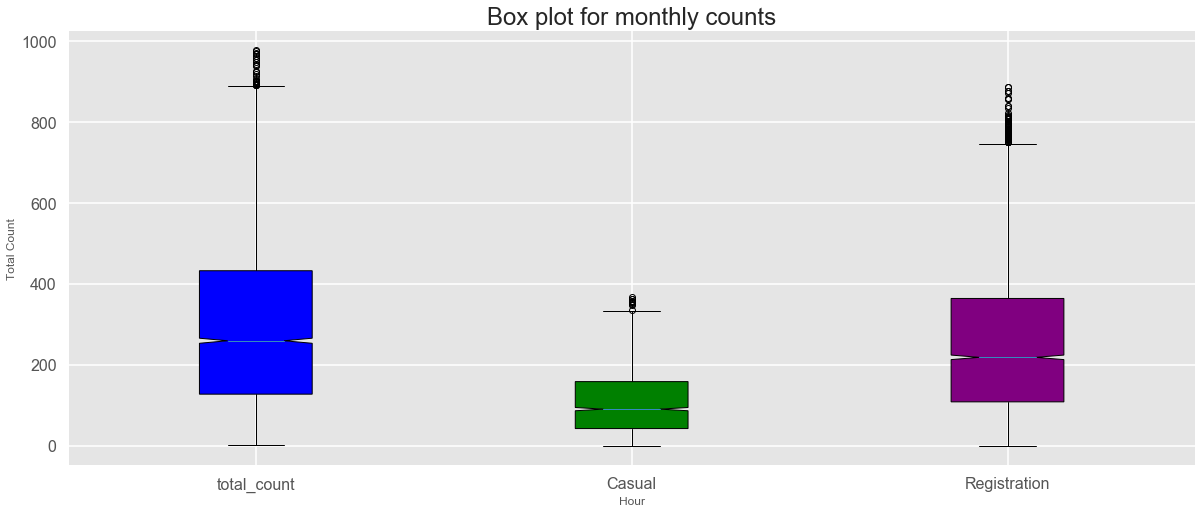

In [67]:
#########################################################################################################################
####################################      Ploting work will done here     ###############################################
#########################################################################################################################
x_ls=[file_total_c_month,file_casual_m,file_reg_m]
labels_box=['total_count','Casual','Registration']
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.ylabel('Total Count')

plt.xlabel('Hour')

plt.title('Box plot for monthly counts',fontsize=24,fontweight=5)
box=plt.boxplot(x_ls,labels=labels_box,patch_artist=True,
                         notch=True)
colors = ['blue', 'green', 'purple', 'tan', 'pink', 'red']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.savefig('D:/Antrix/ML_Code/Labs/ML_Project/Box_plot_for_monthly_counts.png') 
plt.show()


 




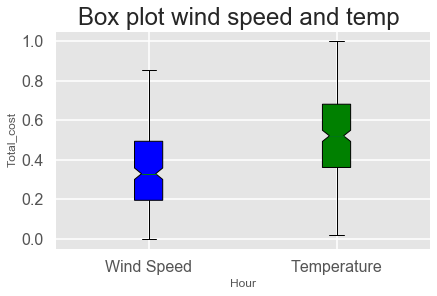

In [68]:
#########################################################################################################################
####################################      Ploting work will done here     ###############################################
#########################################################################################################################
colors = ['blue', 'green', 'purple', 'tan', 'pink', 'red']
labels_x=['Wind Speed','Temperature']
plt.style.use('seaborn-dark-palette')
plt.xlabel('Hour')
plt.ylabel('Total_cost')
plt.title('Box plot wind speed and temp ',fontsize=24,fontweight=5)
boxs=plt.boxplot([file_wind_speed_m,file_temperature_m],labels=labels_x,patch_artist=True,
                         notch=True)
for patch, color in zip(boxs['boxes'], colors):
    patch.set_facecolor(color)
plt.savefig('D:/Antrix/ML_Code/Labs/ML_Project/Box_plot_wind_speed_and_temp.png') 
plt.show()


In [69]:
hour_0=[]
hour_1=[]
hour_2=[]
hour_3=[]
hour_4=[]
hour_5=[]
hour_6=[]
hour_7=[]
hour_8=[]
hour_9=[]
hour_10=[]
hour_11=[]
hour_12=[]
hour_13=[]
hour_14=[]
hour_15=[]
hour_16=[]
hour_17=[]
hour_18=[]
hour_19=[]
hour_20=[]
hour_21=[]
hour_22=[]
hour_23=[]
for i in file_total_c_hour.index:
   
    if i[0]==0:
        hour_0.append(i[1])
    elif i[0]==1:
        hour_1.append(i[1])
    elif i[0]==2:
        hour_2.append(i[1]) 
    elif i[0]==3:
        hour_3.append(i[1])
    elif i[0]==4:
        hour_4.append(i[1])
    elif i[0]==5:
        hour_5.append(i[1])
    elif i[0]==6:
        hour_6.append(i[1])
    elif i[0]==7:
        hour_7.append(i[1])
    elif i[0]==8:
        hour_8.append(i[1])
    elif i[0]==9:
        hour_9.append(i[1])
    elif i[0]==10:
        hour_10.append(i[1])
    elif i[0]==11:
        hour_11.append(i[1])
    elif i[0]==12:
        hour_12.append(i[1])
    elif i[0]==13:
        hour_13.append(i[1])
    elif i[0]==14:
        hour_14.append(i[1])
    elif i[0]==15:
        hour_15.append(i[1])
    elif i[0]==16:
        hour_16.append(i[1])
    elif i[0]==17:
        hour_17.append(i[1])
    elif i[0]==18:
        hour_18.append(i[1])
    elif i[0]==19:
        hour_19.append(i[1])
    elif i[0]==20:
        hour_20.append(i[1])
    elif i[0]==21:
        hour_21.append(i[1])
    elif i[0]==22:
        hour_22.append(i[1])    
    elif i[0]==23:
        hour_23.append(i[1])    
        
        

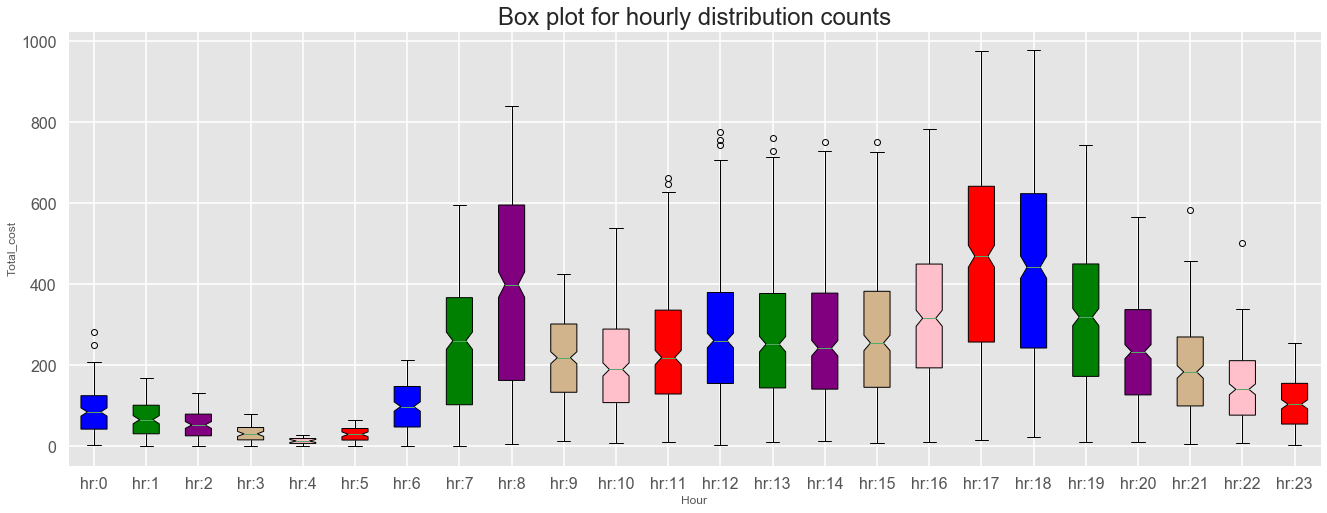

In [70]:
#########################################################################################################################
####################################      Ploting work will done here     ###############################################
#########################################################################################################################
box_ls=[hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23]
label_x=["hr:"+str(a) for a in range(0,24)]
plt.style.use('seaborn-deep')
plt.figure(figsize=(20,8))
plt.grid(True)
plt.gca().margins(x=105)
plt.gcf().canvas.draw()
colors = ['blue', 'green', 'purple', 'tan', 'pink', 'red','blue', 'green', 'purple', 'tan', 'pink', 'red','blue', 'green',
          'purple', 'tan','pink', 'red','blue', 'green', 'purple', 'tan', 'pink', 'red','blue', 'green', 'purple', 'tan', 'pink',
          'red']
plt.xlabel('Hour')
plt.ylabel('Total_cost')
plt.title('Box plot for hourly distribution counts',fontsize=24,fontweight=5)
box=plt.boxplot(box_ls,labels=label_x,patch_artist=True,
                         notch=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.savefig('D:/Antrix/ML_Code/Labs/ML_Project/Box_plot_for_hourly_distribution_counts.png') 
plt.show()

In [71]:
hour_0=[]
hour_1=[]
hour_2=[]
hour_3=[]
hour_4=[]
hour_5=[]
hour_6=[]
hour_7=[]
hour_8=[]
hour_9=[]
hour_10=[]
hour_11=[]
hour_12=[]
hour_13=[]
hour_14=[]
hour_15=[]
hour_16=[]
hour_17=[]
hour_18=[]
hour_19=[]
hour_20=[]
hour_21=[]
hour_22=[]
hour_23=[]
for i in file_temperature_h.index:
    if i[0]==0:
        hour_0.append(i[1])
    elif i[0]==1:
        hour_1.append(i[1])
    elif i[0]==2:
        hour_2.append(i[1]) 
    elif i[0]==3:
        hour_3.append(i[1])
    elif i[0]==4:
        hour_4.append(i[1])
    elif i[0]==5:
        hour_5.append(i[1])
    elif i[0]==6:
        hour_6.append(i[1])
    elif i[0]==7:
        hour_7.append(i[1])
    elif i[0]==8:
        hour_8.append(i[1])
    elif i[0]==9:
        hour_9.append(i[1])
    elif i[0]==10:
        hour_10.append(i[1])
    elif i[0]==11:
        hour_11.append(i[1])
    elif i[0]==12:
        hour_12.append(i[1])
    elif i[0]==13:
        hour_13.append(i[1])
    elif i[0]==14:
        hour_14.append(i[1])
    elif i[0]==15:
        hour_15.append(i[1])
    elif i[0]==16:
        hour_16.append(i[1])
    elif i[0]==17:
        hour_17.append(i[1])
    elif i[0]==18:
        hour_18.append(i[1])
    elif i[0]==19:
        hour_19.append(i[1])
    elif i[0]==20:
        hour_20.append(i[1])
    elif i[0]==21:
        hour_21.append(i[1])
    elif i[0]==22:
        hour_22.append(i[1])    
    elif i[0]==23:
        hour_23.append(i[1])    

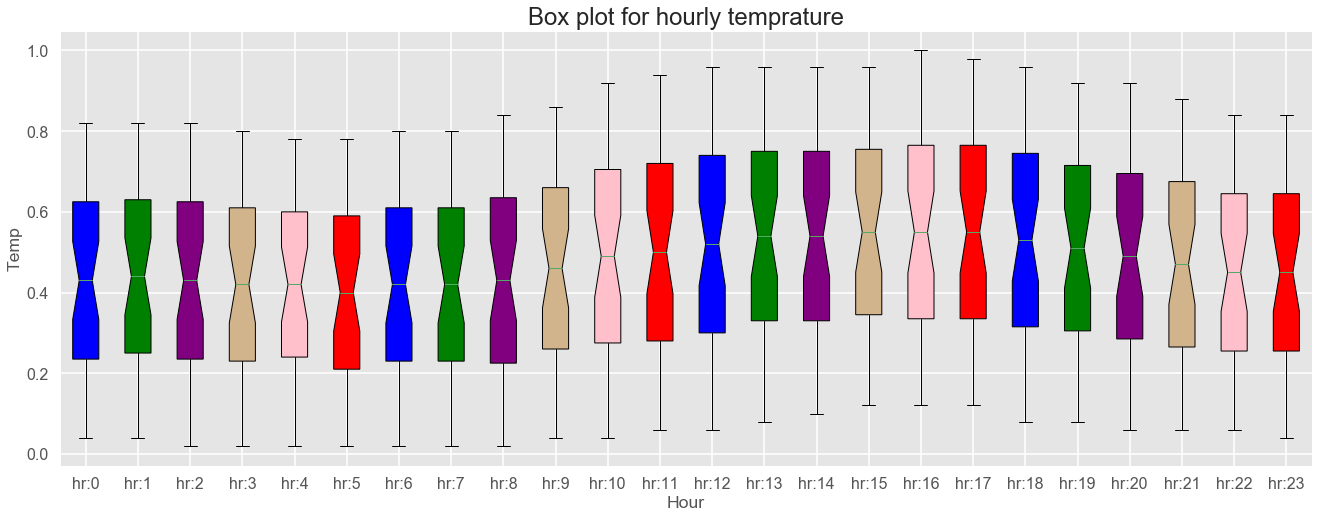

In [72]:
#########################################################################################################################
####################################      Ploting work will done here     ###############################################
#########################################################################################################################
colors = ['blue', 'green', 'purple', 'tan', 'pink', 'red','blue', 'green', 'purple', 'tan', 'pink', 'red','blue', 'green',
          'purple', 'tan','pink', 'red','blue', 'green', 'purple', 'tan', 'pink', 'red','blue', 'green', 'purple', 'tan', 'pink',
          'red']
box_ls=[hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23]
label_x=["hr:"+str(a) for a in range(0,24)]
plt.style.use('seaborn-poster')
plt.figure(figsize=(20,8))
plt.grid(True)
plt.gca().margins(x=105)
plt.gcf().canvas.draw()
box=plt.boxplot(box_ls,labels=label_x,patch_artist=True,
                         notch=True)
plt.xlabel('Hour')
plt.ylabel('Temp')
plt.title('Box plot for hourly temprature',fontsize=24,fontweight=5)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.savefig('D:/Antrix/ML_Code/Labs/ML_Project/Box_plot_for_hourly_temprature.png')
plt.show()

In [73]:
hour_0=[]
hour_1=[]
hour_2=[]
hour_3=[]
hour_4=[]
hour_5=[]
hour_6=[]
hour_7=[]
hour_8=[]
hour_9=[]
hour_10=[]
hour_11=[]
hour_12=[]
hour_13=[]
hour_14=[]
hour_15=[]
hour_16=[]
hour_17=[]
hour_18=[]
hour_19=[]
hour_20=[]
hour_21=[]
hour_22=[]
hour_23=[]
for i in fike_wind_speed_h.index:
    if i[0]==0:
        hour_0.append(i[1])
    elif i[0]==1:
        hour_1.append(i[1])
    elif i[0]==2:
        hour_2.append(i[1]) 
    elif i[0]==3:
        hour_3.append(i[1])
    elif i[0]==4:
        hour_4.append(i[1])
    elif i[0]==5:
        hour_5.append(i[1])
    elif i[0]==6:
        hour_6.append(i[1])
    elif i[0]==7:
        hour_7.append(i[1])
    elif i[0]==8:
        hour_8.append(i[1])
    elif i[0]==9:
        hour_9.append(i[1])
    elif i[0]==10:
        hour_10.append(i[1])
    elif i[0]==11:
        hour_11.append(i[1])
    elif i[0]==12:
        hour_12.append(i[1])
    elif i[0]==13:
        hour_13.append(i[1])
    elif i[0]==14:
        hour_14.append(i[1])
    elif i[0]==15:
        hour_15.append(i[1])
    elif i[0]==16:
        hour_16.append(i[1])
    elif i[0]==17:
        hour_17.append(i[1])
    elif i[0]==18:
        hour_18.append(i[1])
    elif i[0]==19:
        hour_19.append(i[1])
    elif i[0]==20:
        hour_20.append(i[1])
    elif i[0]==21:
        hour_21.append(i[1])
    elif i[0]==22:
        hour_22.append(i[1])    
    elif i[0]==23:
        hour_23.append(i[1])

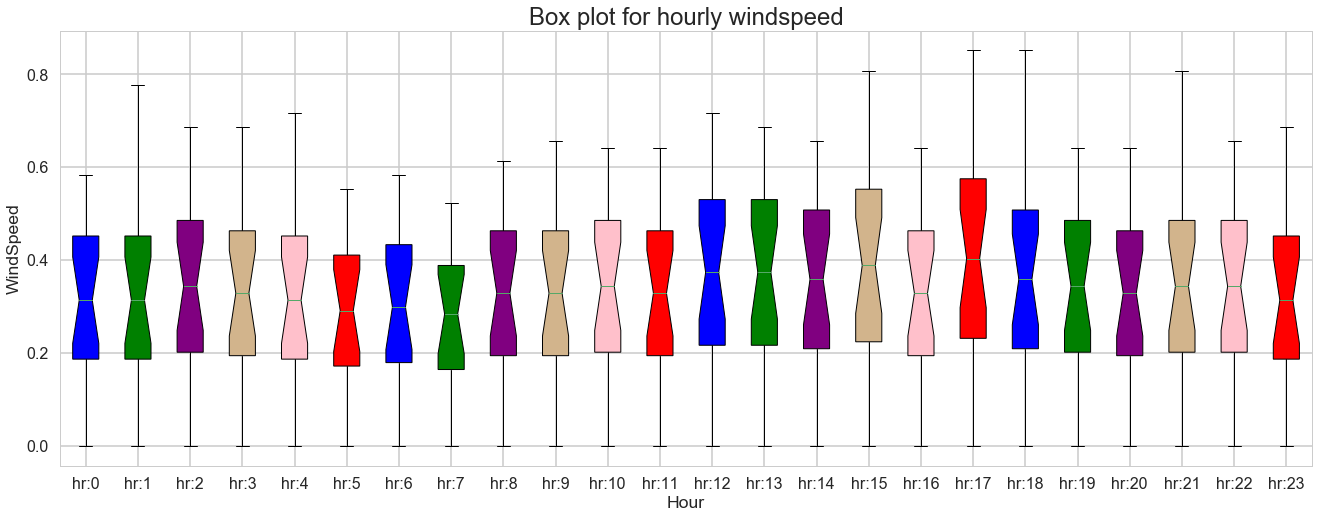

In [74]:
#########################################################################################################################
####################################      Ploting work will done here     ###############################################
#########################################################################################################################
box_ls=[hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23]
label_x=["hr:"+str(a) for a in range(0,24)]
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,8))
plt.grid(True)
plt.gca().margins(x=105)
plt.gcf().canvas.draw()
box=plt.boxplot(box_ls,labels=label_x,patch_artist=True,
                         notch=True)
plt.xlabel('Hour')
plt.ylabel('WindSpeed')
plt.title('Box plot for hourly windspeed',fontsize=24,fontweight=5)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.savefig('D:/Antrix/ML_Code/Labs/ML_Project/Box_plot_for_hourly_windspeed.png')
plt.show()

In [75]:
import math as mt
file_heat_map=file.iloc[:,10:]
file_heat_map.head(0)

,temp,atemp,humidity,windspeed,casual,registered,total_count,season_name


In [76]:
file_corr=round(file_heat_map.corr(),2)

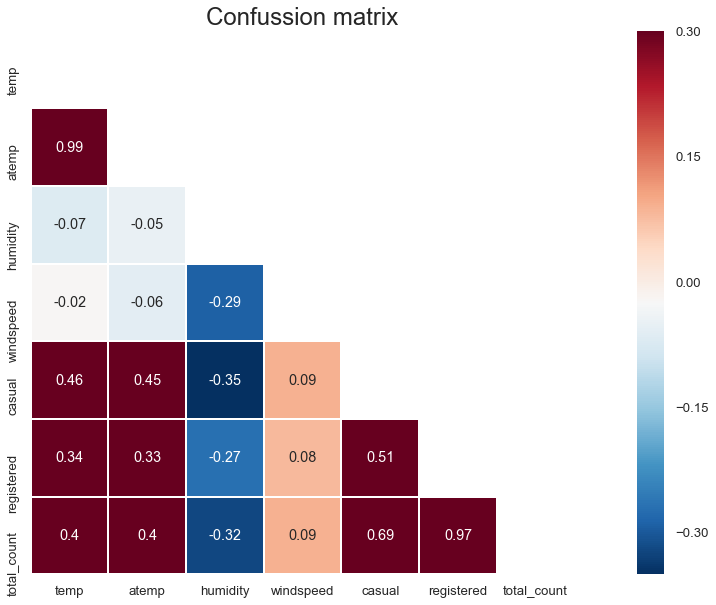

In [78]:
#########################################################################################################################
####################################      Ploting work will done here     ###############################################
#########################################################################################################################
mask = np.zeros_like(file_corr)
plt.style.use('seaborn-white')
plt.figure(figsize=(20,10))
mask[np.triu_indices_from(mask)] = True
with sb.axes_style("white"):
   
    ax = sb.heatmap(file_corr, mask=mask, vmax=.3, square=True,linewidths=1,annot=True,cmap="RdBu_r")
    sb.set(font_scale=1.2)
    plt.title("Confussion matrix",fontsize=24)
    plt.savefig('D:/Antrix/ML_Code/Labs/ML_Project/Confussion_matrix.png')
    plt.show(ax)

        # sb.heatmap(file_corr,linewidths =1,square=True,vmin=0, vmax=1,cbar=True)

In [45]:
mask
np.triu_indices_from(mask)

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,
         8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
        10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 14, 14, 15],
       dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  1,
         2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  2,  3,  4,
         5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  3,  4,  5,  6,  7,  8,
         9, 10, 11, 12, 13, 14, 15,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
        14, 15,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  6,  7

In [44]:
file_corr

,temp,atemp,humidity,windspeed,casual,registered,total_count
temp,1.00,0.99,-0.07,-0.02,0.46,0.34,0.40
atemp,0.99,1.00,-0.05,-0.06,0.45,0.33,0.40
humidity,-0.07,-0.05,1.00,-0.29,-0.35,-0.27,-0.32
windspeed,-0.02,-0.06,-0.29,1.00,0.09,0.08,0.09
casual,0.46,0.45,-0.35,0.09,1.00,0.51,0.69
registered,0.34,0.33,-0.27,0.08,0.51,1.00,0.97
total_count,0.40,0.40,-0.32,0.09,0.69,0.97,1.00


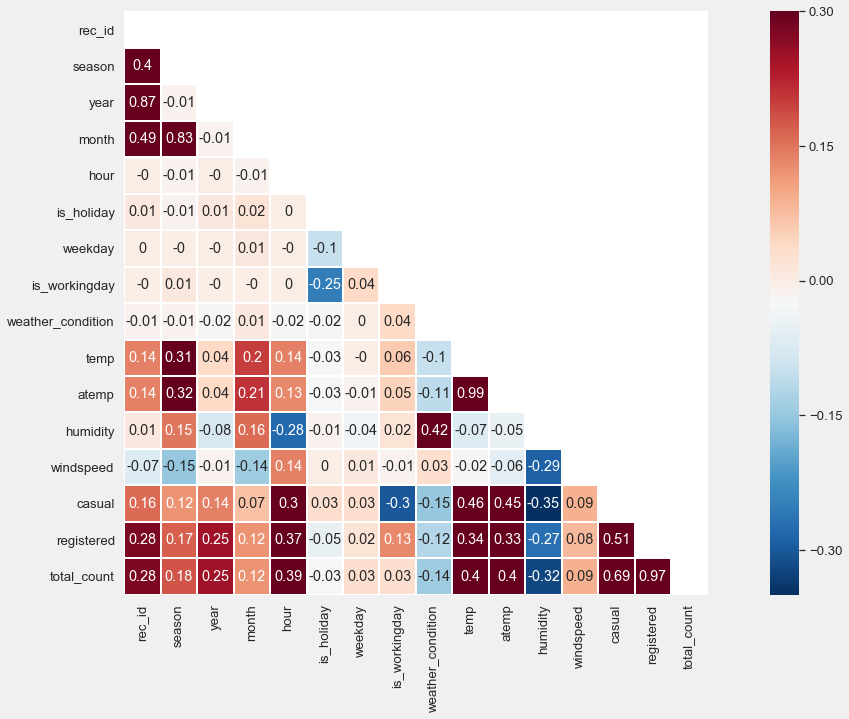

In [35]:
file_predict_temp=round(file.corr(),2)
mask = np.zeros_like(file_predict_temp)
plt.figure(figsize=(20,10))
mask[np.triu_indices_from(mask)] = True
with sb.axes_style("white"):
    ax = sb.heatmap(file_predict_temp, mask=mask, vmax=.3, square=True,linewidths=1,annot=True,cmap="RdBu_r")

# Calculating linear regression

In [36]:
file_predict_inp=file.iloc[:,2:16]
file_predict_op=file['total_count']

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model=LinearRegression()

In [39]:
file['pre_op']=model.fit(file_predict_inp,file_predict_op).predict(file_predict_inp)

In [40]:
model.score(file_predict_inp,file_predict_op)

1.0

In [41]:
file_pre_output=file['pre_op']

In [42]:
import statsmodels.formula.api as ms